In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import string
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pbiswas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/pbiswas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
data = pd.read_csv("amazon_cells_labelled.txt", delimiter= '\t', header=None)
data.columns = ['review', 'pos']

In [5]:
data.head()

,review,pos
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [6]:
#list(data[data.pos == 1].review)  #all complete pos feedback #list shows full content

#list(data[data.pos == 0].review)

In [43]:
words = " ".join(data['review']) #joined dataframe to create string

stop = set(stopwords.words('english'))
word_tokens = word_tokenize(words)  #split text into tokens 

tokenized_words = []
for word in word_tokens:
    if word.lower() not in stop and word.lower() not in string.punctuation:
        tokenized_words.append(word)
        
tokenized_count = Counter(tokenized_words).most_common()
tokenized_count[:50]

[('phone', 151),
 ("n't", 76),
 ('great', 67),
 ('good', 60),
 ('product', 51),
 ('quality', 44),
 ('headset', 44),
 ("'s", 43),
 ('use', 41),
 ('one', 39),
 ('sound', 37),
 ('well', 36),
 ('ear', 34),
 ('would', 34),
 ('battery', 33),
 ('work', 32),
 ('Great', 31),
 ('works', 31),
 ('...', 30),
 ('like', 30),
 ('case', 28),
 ("'ve", 28),
 ('time', 26),
 ('recommend', 26),
 ('price', 26),
 ('could', 23),
 ('get', 22),
 ('really', 22),
 ('2', 22),
 ("'m", 22),
 ('service', 21),
 ('charger', 19),
 ('money', 19),
 ('best', 19),
 ('new', 17),
 ('car', 17),
 ('even', 17),
 ('worked', 17),
 ('ever', 17),
 ('bought', 16),
 ('love', 16),
 ('item', 16),
 ('better', 16),
 ('also', 16),
 ('Works', 15),
 ('first', 15),
 ('used', 15),
 ('Good', 14),
 ('Excellent', 14),
 ('happy', 14)]

In [36]:
# Feature Engineering 

pos_keywords = ['good', 'best', 'excellent', 'fine', 'nice', 'great',
               'satisfied', 'fulfill', 'love', 'eas', 'happy', 'excellent', 
               'recommend', 'impressed', 'incredible', 'well', 'awesome', 'cool',
               'fantastic', 'sturdy' ]

# ':-)' in the keywords created an error

for key in pos_keywords:
    data[str(key)] = data.review.str.contains(' '+ str(key), case=False)

In [37]:
#data.head()

In [38]:
#Features two
pos_intensifiers = ['very', 'pretty', 'highly', 'really', 'perfectly']

for key in pos_intensifiers: 
    data[str(key)] = data.review.str.contains(' ' + str(key) + ' ', case=False)

In [39]:
#data.head()

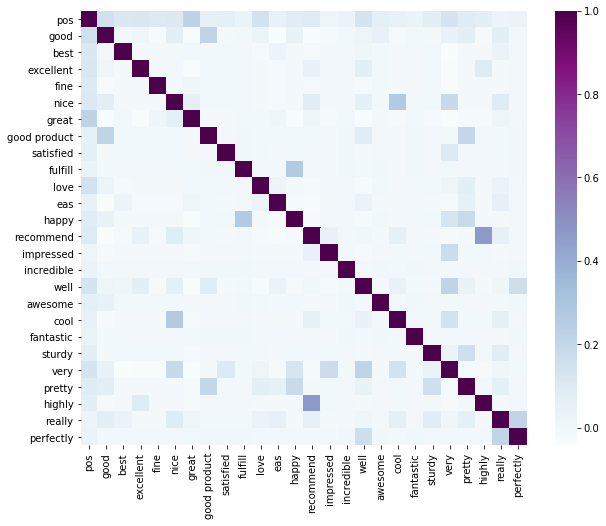

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='BuPu')

In [44]:
# Training data 

X = data[pos_keywords + pos_intensifiers]
y = data.pos

In [45]:
X.head()

,good,best,excellent,fine,nice,great,satisfied,fulfill,love,eas,...,well,awesome,cool,fantastic,sturdy,very,pretty,highly,really,perfectly
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
# Binary data - Bernoulli

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB() # instantiate

# fit model 
bnb.fit(X, y)

y_pred =  bnb.predict(X)

In [47]:
print("Number of mislabeled points out of total {} points: {}".format(
X.shape[0], (y != y_pred).sum()))

Number of mislabeled points out of total 1000 points: 298


In [48]:
data_yelp = pd.read_csv('yelp_labelled.txt', delimiter='\t', header=None)
data_yelp.columns = ['review', 'pos']

In [104]:
data_yelp.head()

,review,pos
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [105]:
y_yelp = data_yelp.pos

In [106]:
bnb.fit(X, y_yelp) 

y_yelp_pred = bnb.predict(X)

In [107]:
print("Trained Amazon model, tested on Yelp. \nNumber of mislabeled points in the yelp data, \
out of total {} points: {}".format(
X.shape[0], (y != y_yelp_pred).sum()))

Trained Amazon model, tested on Yelp. 
Number of mislabeled points in the yelp data, out of total 1000 points: 341
